Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


##Understanding the Data Set


Import data via google drive/local computer, then check the number of columns and rows in the data. Don't forget to check the data type, the amount of initial data, and the missing value for each variable.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Final Project/Employee Mental Health.csv")
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
data.shape

(1259, 27)

From the output above, we find that all variables have object data type, except Age with number (int) data type.

#Preprocessing

At this stage we preprocess the data with several stages including, handling missing values, drop data, detecting unique values, and removing duplicate data.

###Missing Value

In [6]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
#drop data missing 
data.drop(columns=['Timestamp', 'state', 'comments'], 
        inplace = True)


In [8]:
#variabel data list 
intvar = ['Age']
stringvar = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatvar = []

#missing value fill with default string
mv_int = 0
mv_string = 'NaN'
mv_float = 0.0

# Clean the NaN's
for feature in data:
    if feature in intvar:
        data[feature] = data[feature].fillna(mv_int)
    elif feature in stringvar:
        data[feature] = data[feature].fillna(mv_string)
    elif feature in floatvar:
        data[feature] = data[feature].fillna(mv_float)
    else:
        print('Error: Feature %s not recognized.' % feature)

In [9]:
#fill work_interfere
data['work_interfere'] = data['work_interfere'].replace([mv_string], 'Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [10]:
data['self_employed'] = data['self_employed'].replace([mv_string], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [11]:
data['treatment'].value_counts(normalize = True)*100

Yes    50.595711
No     49.404289
Name: treatment, dtype: float64

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [13]:
#Look Age and ender unique values
print(data['Age'].unique())
print("\n \n")
print(data['Gender'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous

In [14]:
#Change data unique Gender to be data default
data['Gender'].replace(['Male ','Man', 'cis male','male', 'M', 'm', 'Male', 'Cis Male', 'Mail', 'Male-ish', 'Male (CIS)','Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 
                       'Male', inplace = True)
data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)','woman',], 
                       'Female', inplace = True)
data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','male leaning androgynous','Agender', 'A little about you', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'fluid', 'queer', 'Androgyne', 'Trans-female',  'Guy (-ish) ^_^', 'Trans woman','Nah', 'All','ostensibly male, unsure what that really means',], 
                       'Other', inplace = True)
data['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [15]:
#Change data unique Age to be data default
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True)
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [16]:
#Find numbers employees unique varibles
data['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

###Data Duplicate

In [17]:
data.duplicated().sum()

4

In [18]:
data.drop_duplicates(keep=False, inplace=True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.shape

(1246, 24)

Based on the output above we find that the Age and Gender features have problems with their values. so it is necessary to change unique data to default. such as, gender = Male and Female. In addition, we found missing data (NaN) for each feature, so it is necessary to drop features on data that has a missing value of more than 30% and handling missing values with fillna according to the default value feature.


Next, check for data duplication and obtain 4 duplicates that must be deleted. So from 1254 data to 1246 data used.

#EDA

We use this stage to view, analyze, and explore what insights can be drawn from the dataset.

In [21]:
data.groupby('tech_company').agg(
    max_age = ('Age','max'),
    max_tech_company = ('tech_company','max')
)

,max_age,max_tech_company
tech_company,,
No,72,No
Yes,62,Yes


In [23]:
#who have employees without a history of mental health continue to work in the office
data[(data['family_history']>'No')&(data['remote_work']>'No')]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
6,35,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
18,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,Yes,Yes,No,Don't know,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
27,35,Female,United States,No,Yes,Yes,Rarely,6-25,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No
31,31,Male,United States,Yes,Yes,No,Rarely,1-5,Yes,Yes,...,Don't know,Somewhat difficult,Yes,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,34,Male,United Kingdom,No,Yes,No,Often,26-100,Yes,No,...,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,Maybe,Yes,Yes,No
1221,46,Male,United States,No,Yes,Yes,Sometimes,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
1243,43,Female,United States,No,Yes,Yes,Rarely,More than 1000,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
1252,29,Male,United States,No,Yes,Yes,Sometimes,100-500,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No


In [ ]:
#Change"Yes" to "No"/"Never" or other to see a lot of employee data that has an effect on the coworkers feature.
data[(data['work_interfere']<"Yes")&(data['coworkers']>'Some of them')]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
5,33,Male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
8,42,Female,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,No,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No
11,29,Male,Bulgaria,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,25,Male,United Kingdom,No,Yes,Yes,Sometimes,More than 1000,No,No,...,Yes,Very easy,No,No,Yes,Yes,Yes,Yes,Yes,No
1233,23,Male,United Kingdom,No,No,Yes,Rarely,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
1235,23,Male,Canada,No,No,Yes,Often,26-100,No,Yes,...,Don't know,Don't know,Maybe,No,Yes,Some of them,No,No,Don't know,No
1239,30,Male,Netherlands,No,No,No,Sometimes,500-1000,No,Yes,...,Don't know,Don't know,Maybe,No,Yes,Yes,Maybe,Yes,Don't know,No


Can be concluded,
*   Technology companies have a maximum age limit of 62 years for employees, while non-IT companies have employees with a maximum age of 72 years.
*   Out of 1200 employees in the data, only 150 employees have a history of mental health and work remotely. It can be concluded, more than 500 employees who do not have a history of mental health can work well in the office or remotely.
*   990 employees who feel or rarely get harassed by some of their coworkers. 46 employees feel they don't know whether they are bothered or not. and 224 employees of whom feel they are often disturbed by their co-workers.


In [30]:
#most of the employees who have work disorders feel that the cause is from the leadership
data[(data['work_interfere']<'Often')&(data['supervisor']>'Some of them')]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
9,23,Male,Canada,No,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No
11,29,Male,Bulgaria,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No
13,36,Male,United States,No,Yes,No,Never,500-1000,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,No,Don't know,No
38,50,Male,United States,No,No,No,Don't know,100-500,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,25,Male,Ireland,No,No,No,Don't know,100-500,No,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No
1202,31,Male,Brazil,Yes,No,Yes,Don't know,1-5,No,Yes,...,No,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
1203,24,Male,United Kingdom,No,No,No,Don't know,100-500,No,Yes,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,Maybe,Don't know,No
1204,34,Male,Ireland,No,Yes,Yes,Never,1-5,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No


220 employees don't know if they are being bullied or not. and 514 employees of whom feel often harassed by supervisors. So it is necessary for the company to take action against superiors who put pressure on their employees.

###EDA Chart

####1. Would you be willing to discuss a mental health issue with your coworkers?

Text(0.5, 1.0, 'Discussing Mental Health with the Coworkers')

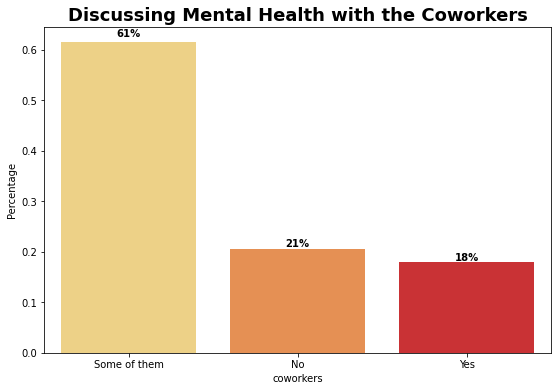

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'coworkers', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Discussing Mental Health with the Coworkers', fontsize=18, fontweight='bold')

####2. Would you be willing to discuss a mental health issue with your direct supervisor(s)?

Text(0.5, 1.0, 'Discussing Mental Health with the Supervisor')

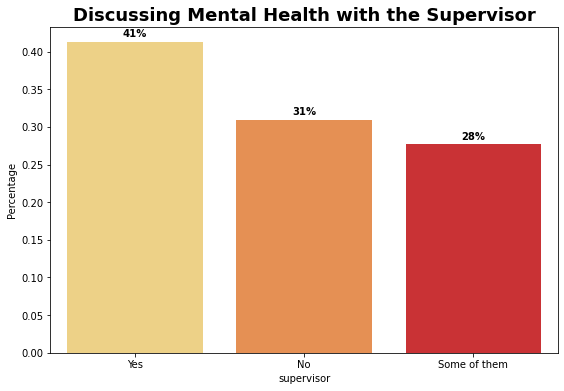

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'supervisor', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Discussing Mental Health with the Supervisor', fontsize=18, fontweight='bold')

####2. Do many employees have a family history of mental health?

Text(0.5, 1.0, 'Family History of Mental Disorders')

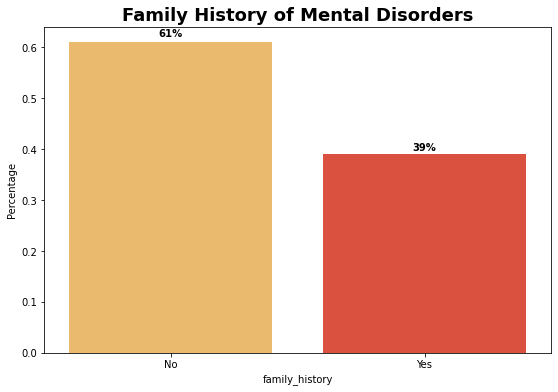

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'family_history', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Family History of Mental Disorders', fontsize=18, fontweight='bold')

####2. What type of company does the employee work for?

Text(0.5, 1.0, 'Working Type of Company Category')

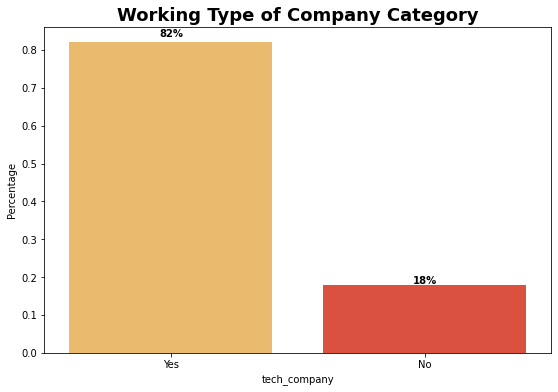

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'tech_company', y = 'Percentage', data = persentasi, palette='YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Company Category', fontsize=18, fontweight='bold')

####2. Does it work remotely or not?

Text(0.5, 1.0, 'Working Type of Remote Works')

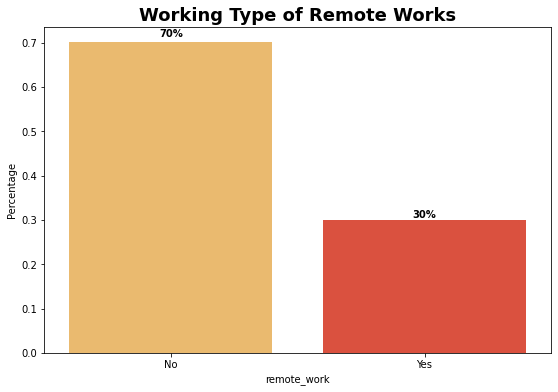

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'remote_work', y = 'Percentage', data = persentasi, palette='YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Remote Works', fontsize=18, fontweight='bold')

####2. How often do employees experience work interruptions?

Text(0.5, 1.0, 'Working Type of Work Interference')

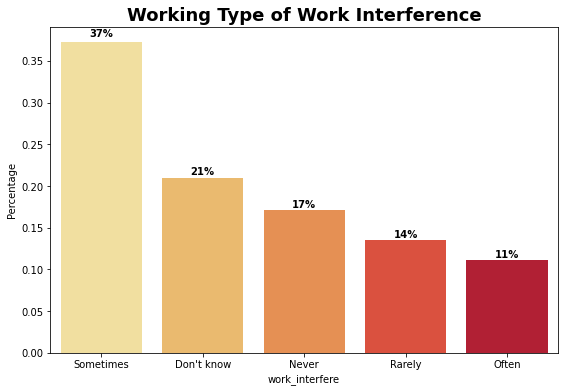

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'work_interfere', y = 'Percentage', data = persentasi, palette='YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Work Interference', fontsize=18, fontweight='bold')

####2. Does time off affect the mental health of employees?

Text(0.5, 1.0, 'Working Type of Leave')

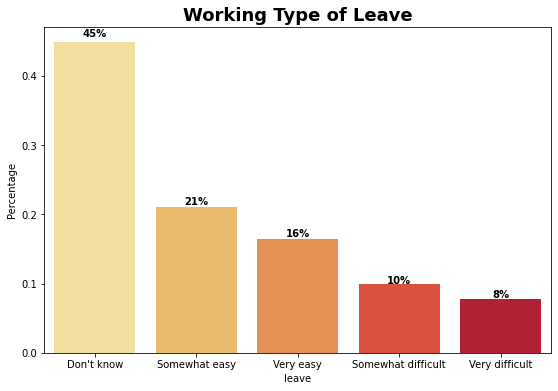

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'leave', y = 'Percentage', data = persentasi, palette='YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Leave', fontsize=18, fontweight='bold')

####2. Are the employees from the company or self-employed?

Text(0.5, 1.0, 'Working Type of Self Employed')

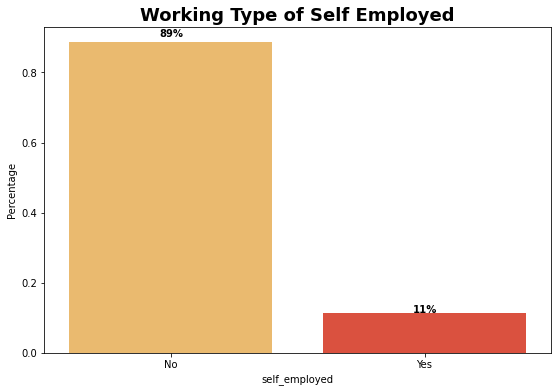

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'self_employed', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Working Type of Self Employed', fontsize=18, fontweight='bold')

####2. Does your employer provide mental health benefits?

Text(0.5, 1.0, 'Working Type of Benefits')

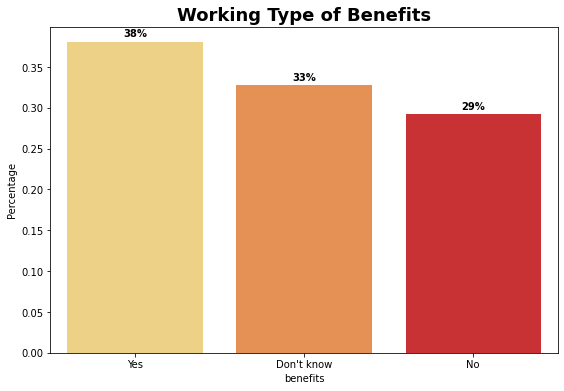

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'benefits', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Working Type of Benefits', fontsize=18, fontweight='bold')

####2. Has your employer ever discussed mental health as part of an employee wellness program?

Text(0.5, 1.0, 'Wellness Program for the Employees')

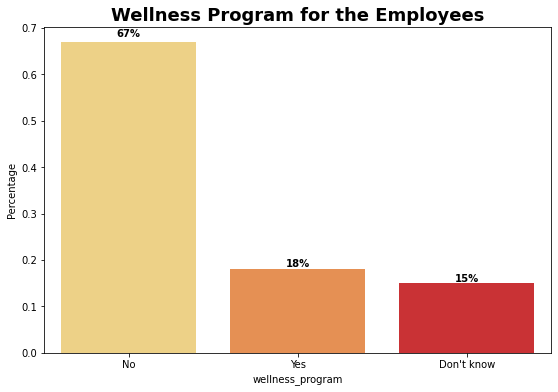

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'wellness_program', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Wellness Program for the Employees', fontsize=18, fontweight='bold')

####2. Does your employer provide resources to learn more about mental health issues and how to seek help?

Text(0.5, 1.0, 'Seek Help for The Employees')

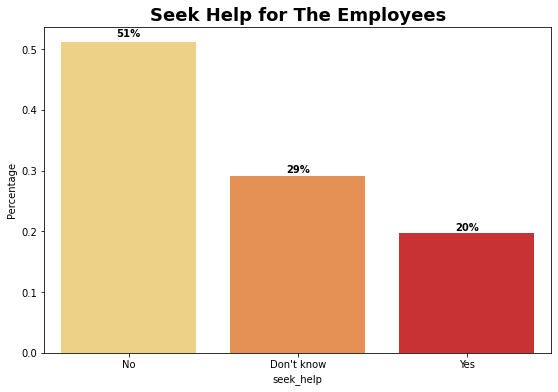

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
persentasi = data['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')
plot = sns.barplot(x = 'seek_help', y = 'Percentage', data = persentasi, palette = 'YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
plt.title('Seek Help for The Employees', fontsize=18, fontweight='bold')

####2. Have you get treatment for a mental health condition?

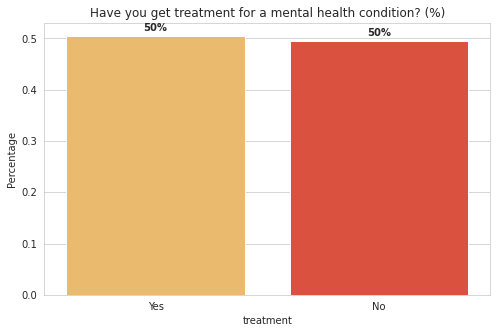

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Have you get treatment for a mental health condition? (%)')
persentasi = data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

plot = sns.barplot(x = 'treatment', y = 'Percentage', data = persentasi.head(10), palette='YlOrRd')
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

####2. the average age of employees working self-employed and technology companies

In [32]:
base_pivot = data.groupby(['tech_company','self_employed']).agg(
   avg_age = ('Age','mean')
).reset_index()

base_pivot

,tech_company,self_employed,avg_age
0,No,No,32.780952
1,No,Yes,36.071429
2,Yes,No,31.664430
3,Yes,Yes,32.898438


####2. the company's attitude towards the mental health of employees according to the age of the employee.

In [ ]:
base_pivot = data.groupby(['tech_company','wellness_program']).agg(
   avg_age = ('Age','mean')
).reset_index()

base_pivot

,tech_company,wellness_program,avg_age
0,0,0,20.115385
1,0,1,16.656489
2,0,2,19.522388
3,1,0,15.875776
4,1,1,16.646724
5,1,2,18.553459


####2. how much influence leave and work_remote have on mental health consequences

In [ ]:
data['leave'].unique()

array([2, 0, 1, 3, 4])

In [36]:
base_pivot = data.groupby(['leave','remote_work']).agg(
   avg_consequence = ('mental_health_consequence','mean')
).reset_index()

base_pivot

,leave,remote_work,avg_consequence
0,0,0,0.736715
1,0,1,0.800000
2,1,0,1.081395
3,1,1,1.189189
4,2,0,0.716578
5,2,1,0.786667
6,3,0,1.254237
7,3,1,1.500000
8,4,0,0.858268
9,4,1,0.846154


####2. how much influence the type of company and treatment provided on mental health consequences

In [37]:
base_pivot = data.groupby(['tech_company','treatment']).agg(
   avg_consequence = ('mental_health_consequence','mean')
).reset_index()

base_pivot

,tech_company,treatment,avg_consequence
0,0,No,0.740385
1,0,Yes,0.916667
2,1,No,0.846004
3,1,Yes,0.856582


####2. How many tech companies give treatment

In [ ]:
df_pivot = pd.pivot_table(base_pivot,
               index='tech_company',
               columns='treatment')

df_pivot['avg_age']

treatment,0,1
tech_company,,
0,0.740385,0.916667
1,0.846004,0.856582


In [ ]:
data.describe()

,Age
count,1246.000000
mean,32.028892
std,7.393200
min,5.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


#Encoding

In [21]:
labelDict = {}
numericals = ['Age','Gender','Country', 'self_employed', 'family_history', 'work_interfere',
              'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
              'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
              'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program', 'seek_help']
for feature in numericals:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'treatment' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


data.head()

treatmentAge [5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
treatmentGender ['Female', 'Male', 'Other']
treatmentCountry ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
treatmentself_employed ['No', 'Yes']
treatmentfamily_history ['No', 'Yes']
treatmentwork_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
treatmentno_employees

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,22,0,44,0,0,Yes,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,29,1,44,0,0,No,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,17,1,7,0,0,No,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,16,1,43,0,1,Yes,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,16,1,44,0,0,No,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


#Data Transformation

###Gaussian Distribution

In [22]:
import scipy.stats as stats
import pylab

In [23]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                          0.848960
Gender                      -1.023224
Country                     -1.610329
self_employed                2.432594
family_history               0.451387
work_interfere              -0.240688
no_employees                -0.154994
remote_work                  0.877267
tech_company                -1.669847
benefits                    -0.100149
care_options                 0.092855
wellness_program             0.001250
seek_help                    0.126858
anonymity                    0.750949
leave                        0.564507
mental_health_consequence    0.264457
phys_health_consequence     -0.396025
coworkers                    0.016645
supervisor                  -0.196262
mental_health_interview     -0.746832
phys_health_interview        0.490492
mental_vs_physical           0.360675
obs_consequence              2.025080
dtype: float64

See how many features have a positive/negative correlation. From the output above, the dataset has a negative skewed correlation on several features including: mental_health_interview, supervisor, phys_health_consequence, benefits, tech_company, no_employees, work_interfere, Country, Gender

###Handling Outlier

Only 'Age' logs transformation, because there are quite a lot of outliers

In [24]:
def normal (data, feature):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


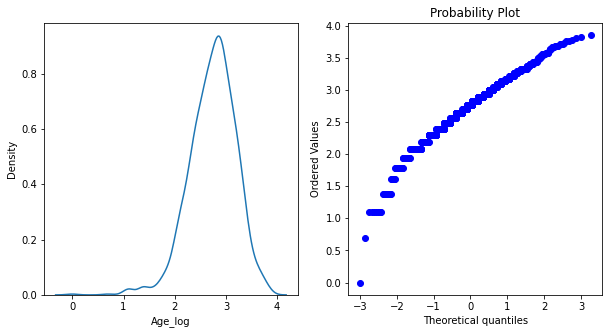

In [25]:
data['Age_log']=np.log(data['Age'])
normal(data,'Age_log')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

Text(0.5, 0, '')

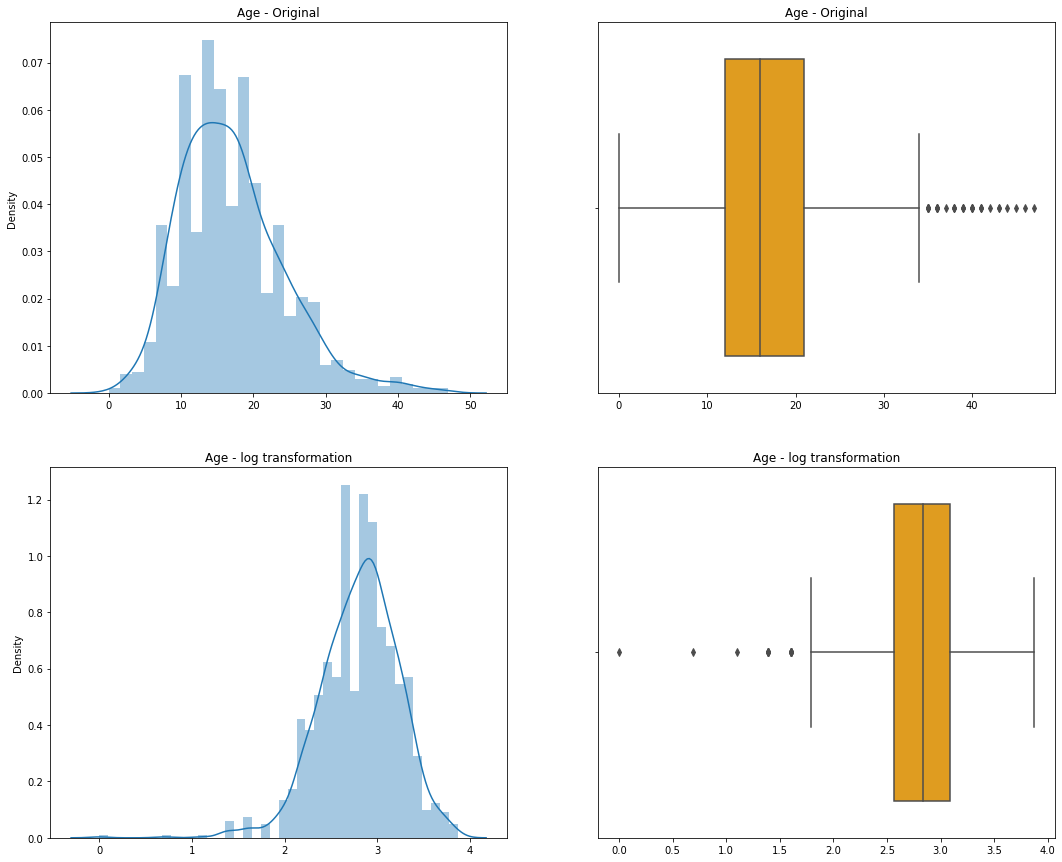

In [26]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data['Age'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Age - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data['Age'],color='orange',orient='h', ax=ax[0,1])
ax[0,1].set_title('Age - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log(data['Age']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Age - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log(data['Age']+1),color='orange',orient='h', ax=ax[1,1])
ax[1,1].set_title('Age - log transformation')
ax[1,1].set_xlabel('')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


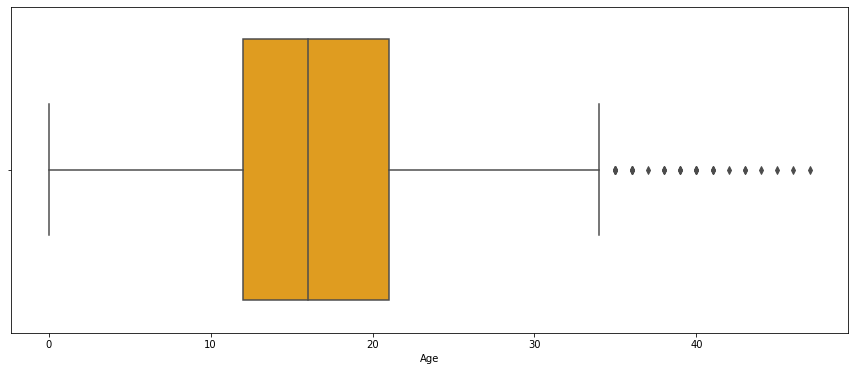

In [27]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['Age'],color='orange',orient='h')

In [28]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_log
0,22,0,44,0,0,Yes,2,4,0,1,...,2,1,1,1,2,1,0,2,0,3.091042
1,29,1,44,0,0,No,3,5,0,0,...,0,0,1,0,0,1,1,0,0,3.367296
2,17,1,7,0,0,No,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2.833213
3,16,1,43,0,1,Yes,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2.772589
4,16,1,44,0,0,No,1,1,1,1,...,0,1,1,1,2,2,2,0,0,2.772589


**outlier filter for under 20 years old with IQR Method. Only those under 10 years of age are removed, because workers in the company may not be 10 years old.**

In [29]:
print('Jumlah baris sebelum handling outlier pada kolom Age:', len(data))
Q1 = data['Age'].quantile(0)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = data['Age'] <= high_limit
data = data[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris sebelum handling outlier pada kolom Age: 1246
Jumlah baris setelah memfilter outlier: 1246


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_log
0,22,0,44,0,0,Yes,2,4,0,1,...,2,1,1,1,2,1,0,2,0,3.091042
1,29,1,44,0,0,No,3,5,0,0,...,0,0,1,0,0,1,1,0,0,3.367296
2,17,1,7,0,0,No,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2.833213
3,16,1,43,0,1,Yes,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2.772589
4,16,1,44,0,0,No,1,1,1,1,...,0,1,1,1,2,2,2,0,0,2.772589


**Encoding "treatment" feature**

In [30]:
labelDict = {}
numericals = ['Age_log']
for feature in numericals:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'treatment' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


data.head()

treatmentAge_log [-inf, 0.0, 0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 1.791759469228055, 1.9459101490553132, 2.0794415416798357, 2.1972245773362196, 2.302585092994046, 2.3978952727983707, 2.4849066497880004, 2.5649493574615367, 2.6390573296152584, 2.70805020110221, 2.772588722239781, 2.833213344056216, 2.8903717578961645, 2.9444389791664403, 2.995732273553991, 3.044522437723423, 3.091042453358316, 3.1354942159291497, 3.1780538303479458, 3.2188758248682006, 3.258096538021482, 3.295836866004329, 3.332204510175204, 3.367295829986474, 3.4011973816621555, 3.4339872044851463, 3.4657359027997265, 3.4965075614664802, 3.5263605246161616, 3.5553480614894135, 3.58351893845611, 3.6109179126442243, 3.6375861597263857, 3.6635616461296463, 3.6888794541139363, 3.713572066704308, 3.7376696182833684, 3.7612001156935624, 3.784189633918261, 3.8066624897703196, 3.828641396489095, 3.8501476017100584]


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_log
0,22,0,44,0,0,Yes,2,4,0,1,...,2,1,1,1,2,1,0,2,0,22
1,29,1,44,0,0,No,3,5,0,0,...,0,0,1,0,0,1,1,0,0,29
2,17,1,7,0,0,No,3,4,0,1,...,1,1,1,2,2,2,2,1,0,17
3,16,1,43,0,1,Yes,2,2,0,1,...,1,2,2,1,0,0,0,1,1,16
4,16,1,44,0,0,No,1,1,1,1,...,0,1,1,1,2,2,2,0,0,16


#Correlation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


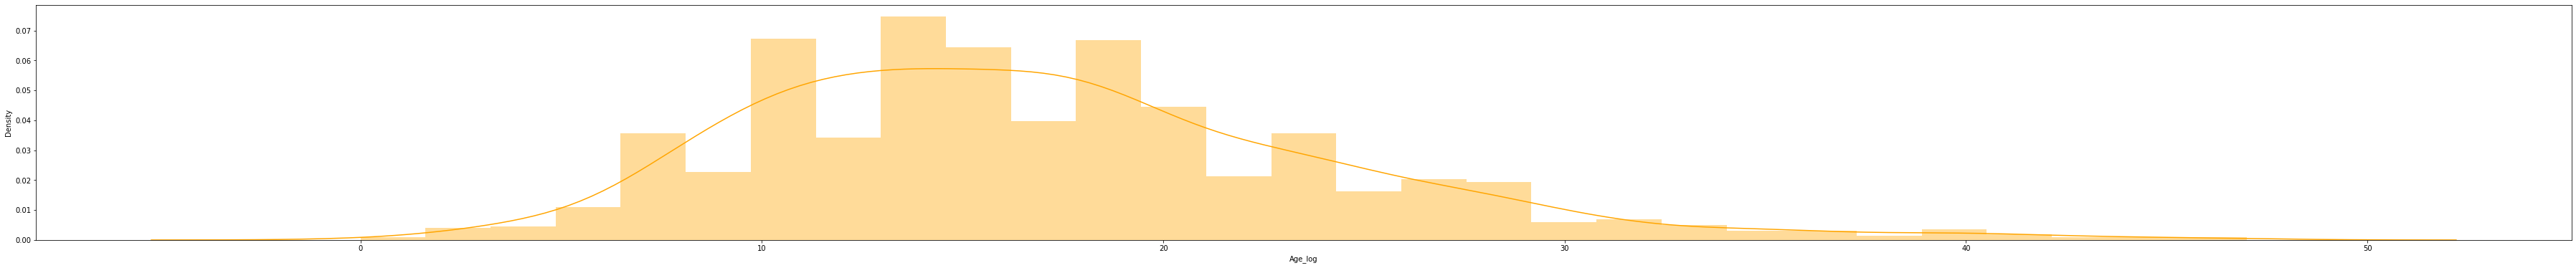

In [31]:
plt.figure(figsize=(50,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='orange')
    plt.xlabel(features[i])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


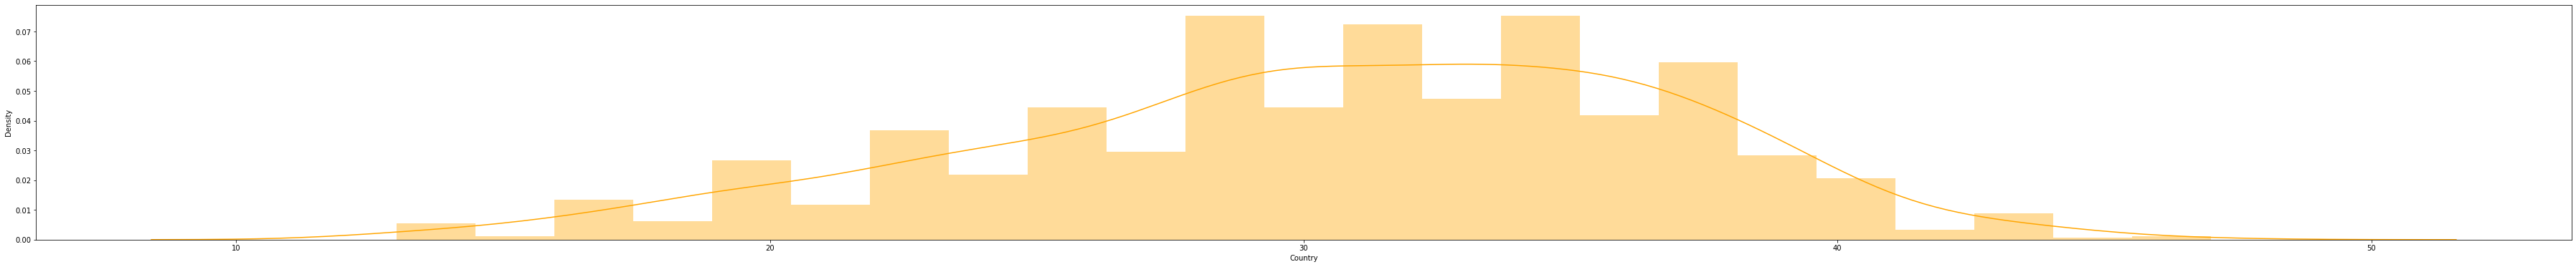

In [ ]:
 plt.figure(figsize=(50,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='orange')
    plt.xlabel(features[i])
    plt.tight_layout()

Based on the output above, we find that the dataset results are well distributed. because the outliers have been resolved and the data has been log transformation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


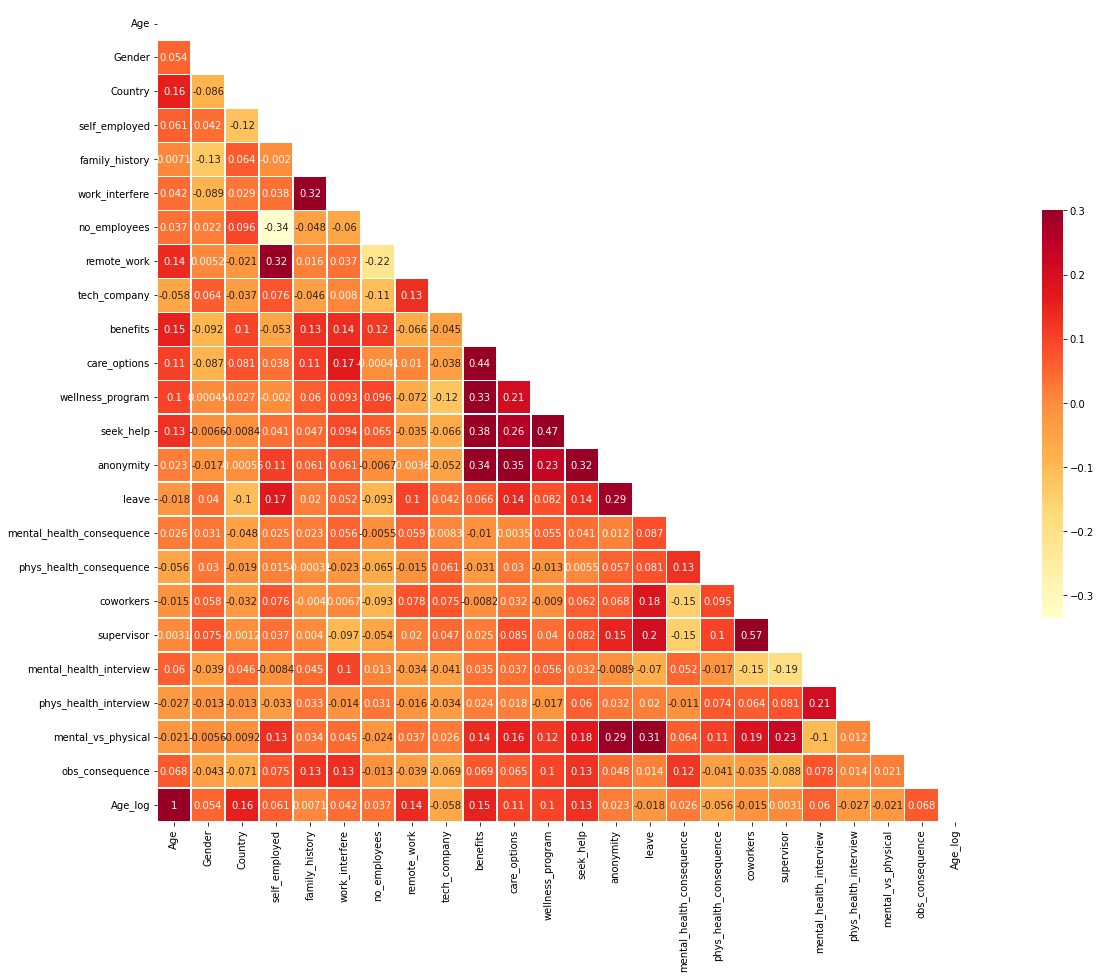

In [32]:
#correlation matrix
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 15))

#heatmap
sns.heatmap(corr, mask=mask, cmap='YlOrRd', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

We can see some positive correlations between variables:
*   supervisors and mental_vs_physical: When employers take mental health as seriously as physical health, employees are more willing to discuss it with supervisors.
*   work interfere, treatment, and family history: Having a family history, or seeking treatment, may indicate that the respondent is more likely to have a job that is disrupted by a mental condition.
*   Number of employees, benefits, health programs and seeking assistance. Bigger companies can afford better mental health facilities, benefits, treatment options, wellness programs, seeking help, anonymity. These variables support each other.


#Split Data Train, Test, & Val

In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [34]:
X = data.drop('treatment', axis=1)
y = data['treatment']

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [36]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [37]:
key = ['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
value = [KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0)]
models = dict(zip(key,value))
models

NameError: ignored

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(random_state=42)
ranfor.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred_knn = knn.predict(X_test)

y_pred_rf = ranfor.predict(X_test)

y_pred_dt = dt.predict(X_test)

In [46]:
print('Akurasi KNN',accuracy_score(y_test, y_pred_knn))
print('Akurasi Random Forest',accuracy_score(y_test, y_pred_rf))
print('Akurasi Decission Tree',accuracy_score(y_test, y_pred_dt))

Akurasi KNN 0.7085561497326203
Akurasi Random Forest 0.8181818181818182
Akurasi Decission Tree 0.7540106951871658


#Hyperparameter Tuning

###K-NN


In [53]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [54]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='accuracy')

**because the data is balanced, then use accuracy, not recall**

In [55]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.666273,7
1,{'n_neighbors': 3},0.714417,6
2,{'n_neighbors': 4},0.715521,5
3,{'n_neighbors': 5},0.729281,4
4,{'n_neighbors': 6},0.730417,3
5,{'n_neighbors': 7},0.753327,1
6,{'n_neighbors': 8},0.738430,2


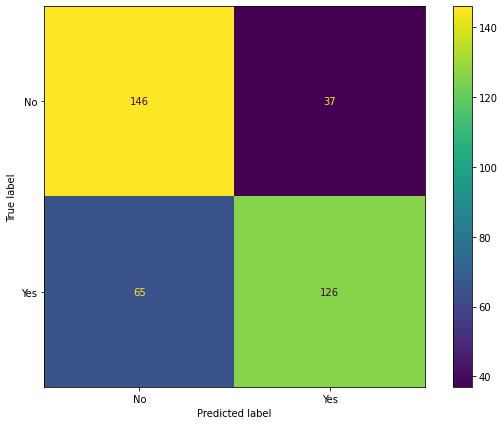

In [56]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [57]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.69      0.80      0.74       183
         Yes       0.77      0.66      0.71       191

    accuracy                           0.73       374
   macro avg       0.73      0.73      0.73       374
weighted avg       0.73      0.73      0.73       374



###RF

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 6.97 s, sys: 58.3 ms, total: 7.03 s
Wall time: 7.61 s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.825616,1
15,"{'max_depth': 4, 'n_estimators': 10}",0.819882,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.819875,3
19,"{'max_depth': 4, 'n_estimators': 50}",0.818719,4
18,"{'max_depth': 4, 'n_estimators': 40}",0.818719,4
17,"{'max_depth': 4, 'n_estimators': 30}",0.817563,6
24,"{'max_depth': 5, 'n_estimators': 50}",0.816440,7
20,"{'max_depth': 5, 'n_estimators': 10}",0.812979,8
12,"{'max_depth': 3, 'n_estimators': 30}",0.810700,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.810686,10


In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='accuracy', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 2.83 s, sys: 19.9 ms, total: 2.85 s
Wall time: 2.86 s


In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'n_estimators': 40, 'max_depth': 5}",0.825616,1
2,"{'n_estimators': 30, 'max_depth': 5}",0.819875,2
6,"{'n_estimators': 30, 'max_depth': 4}",0.817563,3
5,"{'n_estimators': 50, 'max_depth': 5}",0.816440,4
3,"{'n_estimators': 20, 'max_depth': 5}",0.809557,5
8,"{'n_estimators': 50, 'max_depth': 3}",0.809550,6
4,"{'n_estimators': 10, 'max_depth': 3}",0.805025,7
9,"{'n_estimators': 20, 'max_depth': 3}",0.798082,8
1,"{'n_estimators': 30, 'max_depth': 1}",0.795816,9
0,"{'n_estimators': 20, 'max_depth': 2}",0.769465,10


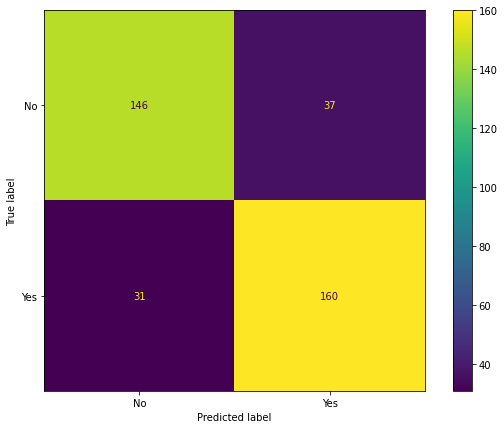

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()


In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.80      0.81       183
         Yes       0.81      0.84      0.82       191

    accuracy                           0.82       374
   macro avg       0.82      0.82      0.82       374
weighted avg       0.82      0.82      0.82       374



###Decision Tree


In [ ]:
# define the estimator/model
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_clf_gridcv = GridSearchCV(dt_clf, parameters, cv=5, scoring='accuracy')
dt_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=parameters, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
data = pd.DataFrame(grid_search.cv_results_)
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003870,0.000328,0.001382,0.000181,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.894495,0.853211,0.793578,0.793578,0.833716,0.042709,1
1,0.003577,0.000369,0.001568,0.000733,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.894495,0.853211,0.793578,0.793578,0.833716,0.042709,1
2,0.004394,0.001431,0.001239,0.000046,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.894495,0.853211,0.793578,0.793578,0.833716,0.042709,1
3,0.003479,0.000265,0.001286,0.000033,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.894495,0.853211,0.793578,0.793578,0.833716,0.042709,1
4,0.003634,0.000506,0.001286,0.000148,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.894495,0.853211,0.793578,0.793578,0.833716,0.042709,1


**because the data is balanced, then use accuracy, not recall**

In [ ]:
# the compact results
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.833635,1
1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.833635,1
2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.833635,1
3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.833635,1
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.833635,1
5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.827888,28
6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.827888,28
7,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.827888,28
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.833635,1
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.833635,1


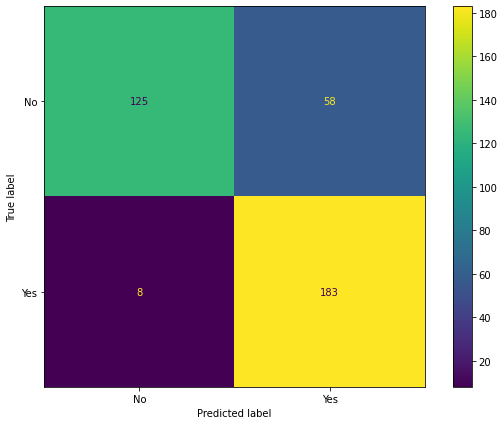

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.94      0.68      0.79       183
         Yes       0.76      0.96      0.85       191

    accuracy                           0.82       374
   macro avg       0.85      0.82      0.82       374
weighted avg       0.85      0.82      0.82       374

